In [1]:
import os
import subprocess

In [2]:
!STAR --version

2.7.11b


In [3]:
def make_dir(directory_name, outdir = ""):
    path = outdir+directory_name
    try:
        os.makedirs(path)
        print(f"Directory '{directory_name}' created successfully.")
    except FileExistsError:
        print(f"Directory '{directory_name}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [4]:
outdir = "/mnt/data1/10XvParse/"
analdir = outdir + "Analysis_2/"
star_folder = analdir + "STAR/"
ref_folder = outdir + "Indexes/"
index_folder = star_folder + "Indexes/"
results_folder = star_folder + "Results/"

In [5]:
make_dir(star_folder)
make_dir(index_folder)
make_dir(results_folder)

Directory '/mnt/data1/10XvParse/Analysis_2/STAR/' already exists.
Directory '/mnt/data1/10XvParse/Analysis_2/STAR/Indexes/' already exists.
Directory '/mnt/data1/10XvParse/Analysis_2/STAR/Results/' already exists.


In [9]:
genome_command = [
    "STAR",
    "--runThreadN", "16",
    "--runMode", "genomeGenerate",
    "--genomeDir", index_folder,
    "--genomeFastaFiles", ref_folder + "mmus.fa",
    "--sjdbGTFfile", ref_folder + "mmus.gtf",
    "--outTmpDir", star_folder + "Temp/",
    "--outFileNamePrefix", results_folder,
]
subprocess.run(genome_command)

	/home/mcaskey/miniconda3/envs/10XvParse/bin/STAR-avx2 --runThreadN 16 --runMode genomeGenerate --genomeDir /mnt/data1/10XvParse/Analysis_2/STAR/Indexes/ --genomeFastaFiles /mnt/data1/10XvParse/Indexes/mmus.fa --sjdbGTFfile /mnt/data1/10XvParse/Indexes/mmus.gtf --outTmpDir /mnt/data1/10XvParse/Analysis_2/STAR/Temp/ --outFileNamePrefix /mnt/data1/10XvParse/Analysis_2/STAR/Results/
	STAR version: 2.7.11b   compiled: 2024-11-25T09:14:51+0000 :/opt/conda/conda-bld/star_1732525954305/work/source
Sep 15 11:53:26 ..... started STAR run
Sep 15 11:53:26 ... starting to generate Genome files


KeyboardInterrupt: 

In [12]:
names = ['10x', 'polyT', 'randO', 'parse']

In [7]:
# Where data is stored
fasta_folder = analdir + "FASTA/Sampled/"

In [8]:
def align(name):
    align_command = [
        "STAR",
        "--runThreadN", "16",
        "--genomeDir", index_folder,
        "--readFilesIn", fasta_folder + name + "_1.fasta.gz", fasta_folder + name + "_2.fasta.gz",
        "--readFilesCommand", "gunzip", "-c",
        "--outSAMtype", "BAM", "SortedByCoordinate",
        "--outTmpDir", star_folder + "Temp/",
        "--outFileNamePrefix", results_folder + name + "_"
    ]
    subprocess.run(align_command)

In [8]:
for name in names:
    align(name)

NameError: name 'align' is not defined

In [8]:
for name in names:
    !samtools index {results_folder+name}_Aligned.sortedByCoord.out.bam
    !geneBody_coverage.py -r {ref_folder+"mmus.bed"} -i {results_folder+name+"_Aligned.sortedByCoord.out.bam"} -o {results_folder+name}

@ 2025-09-15 22:46:26: Read BED file (reference gene model) ...
@ 2025-09-15 22:46:51: Total 278396 transcripts loaded
@ 2025-09-15 22:46:51: Get BAM file(s) ...
	/mnt/data1/10XvParse/Analysis_2/STAR/Results/polyT_Aligned.sortedByCoord.out.bam
@ 2025-09-15 22:46:51: Processing polyT_Aligned.sortedByCoord.out.bam ...
 100 transcripts finished	200 transcripts finished	300 transcripts finished	400 transcripts finished	500 transcripts finished	600 transcripts finished	700 transcripts finished	800 transcripts finished	900 transcripts finished	1000 transcripts finished	1100 transcripts finished	1200 transcripts finished	1300 transcripts finished	1400 transcripts finished	1500 transcripts finished	1600 transcripts finished	1700 transcripts finished	1800 transcripts finished	1900 transcripts finished	2000 transcripts finished	2100 transcripts finished	2200 transcripts finished	2300 transcripts finished	2400 transcripts finished	2500 transcripts finished	2600 transcripts finished	2700 transcrip

In [15]:
import matplotlib.pyplot as plt
import numpy as np

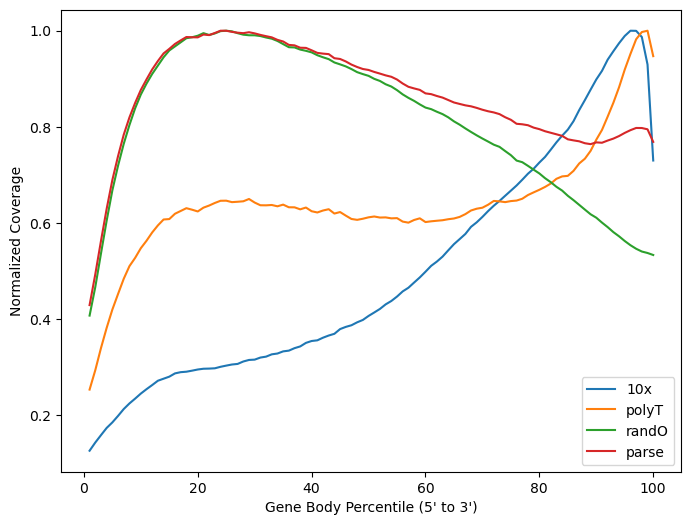

In [20]:
plt.figure(figsize=(8, 6))

for name in names:
    with open(f"{results_folder}{name}.geneBodyCoverage.txt") as f:
        lines = f.readlines()
        if len(lines) > 1:
            last_line = lines[-1].strip().split()
            coverage_values = list(map(float, last_line[1:]))
            plt.plot(range(1, len(coverage_values) + 1), coverage_values/ np.max(coverage_values), label=name)
            plt.legend()

plt.xlabel('Gene Body Percentile (5\' to 3\')')
plt.ylabel('Normalized Coverage')
plt.show()